In [1]:
import pickle
import re
import numpy as np
import ast

In [2]:
from os import listdir
import glob


In [3]:
file_names = glob.glob('../../iclr_result_dirs/teacher_student/out*')

In [4]:
len(file_names)

625

In [5]:
file_name='../../iclr_result_dirs/teacher_student/out_traject.831800'

In [6]:
def vanilla_out_parser(file_name):    
    count_test_results = 0
    done_config = False
    accu_list=[]
    with open(file_name,'r') as f:
        for line in f:
            if not done_config and line[:6]=='config':
                config_dict_str = line[7:].lstrip()
                done_config = True
            if line[:6] == 'python':
                python_commant = line
            if count_test_results > 0:
                accu = line.split(':')[-1]
                accu_list.append(float(accu))
                count_test_results -= 1
            if 'running 5 times on test data' in line:
                count_test_results = 5

    # print(accu_list)
    if len(accu_list)>0:
        config_dict = ast.literal_eval(config_dict_str)
#         print(config_dict)
#         print(np.mean(accu_list))
        config_dict['accuracy'] = np.mean(accu_list)
        config_dict['accuracy_std'] = np.std(accu_list)
#         config_dict['accuracy'] = np.mean(accu_list)
        return config_dict
    else:
        return None


In [7]:
records = []
for ii,file_name in enumerate(file_names):
    conf=vanilla_out_parser(file_name)
    if conf is not None:
        conf['file_name']=file_name.split('/')[-1]
        conf['file_name_full']=file_name
        conf['teacher_short']=conf['teacher_net'][-25:]
#         print(conf['teacher_short'])
        records.append(conf)

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(records)

In [10]:
df.columns

Index(['accuracy', 'accuracy_std', 'batch_norm_student', 'broadcast',
       'conv_rnn_type', 'data_augmentation', 'dataset_center', 'dataset_norm',
       'decoder_epochs', 'decoder_optimizer', 'dense_interface', 'dropout',
       'dropout1', 'dropout2', 'epochs', 'file_name', 'file_name_full',
       'fine_tune_student', 'height_shift_range', 'int_epochs',
       'last_layer_size', 'last_maxpool_en', 'layer_norm_2', 'layer_norm_res',
       'layer_norm_student', 'learning_patience', 'loss', 'manual_suffix',
       'max_length', 'n_classes', 'n_samples', 'nl', 'noise', 'num_feature',
       'pos_det', 'pretrained_net', 'pretrained_student_path',
       'random_n_samples', 'res', 'resblocks', 'resnet_mode', 'rnn_dropout',
       'rnn_layer1', 'rnn_layer2', 'rotation_range', 'run_index',
       'run_name_prefix', 'shuffle_traj', 'skip_conn', 'skip_student_training',
       'snellen', 'stopping_patience', 'student_block_size', 'student_nl',
       'student_version', 'style', 'syclopic_no

In [11]:
df.sort_values(by=['vm_kappa']).loc[df['style']=='xx1_vonmises_walk'].loc[:,['file_name','style','vm_kappa', 'accuracy']]

,file_name,style,vm_kappa,accuracy
13,out2_net.821755,xx1_vonmises_walk,-5.0,0.69404
34,out_traject.775281,xx1_vonmises_walk,-5.0,0.70802
78,out2_net.821788,xx1_vonmises_walk,-5.0,0.69774
7,out2_net.872010,xx1_vonmises_walk,-5.0,0.70244
99,out2_net.821722,xx1_vonmises_walk,-5.0,0.70070
163,out2_net.872024,xx1_vonmises_walk,-5.0,0.69836
50,out_traject.961905,xx1_vonmises_walk,-5.0,0.70564
112,out2_net.872017,xx1_vonmises_walk,-5.0,0.70080
133,out2_net.821717,xx1_vonmises_walk,-2.0,0.70076
114,out2_net.872009,xx1_vonmises_walk,-2.0,0.70420


In [12]:
df.sort_values(by=['vm_kappa']).loc[df['style']=='xx1_vonmises_walk'].loc[df['shuffle_traj']==True].loc[:,['file_name','style','vm_kappa', 'accuracy']]

,file_name,style,vm_kappa,accuracy
7,out2_net.872010,xx1_vonmises_walk,-5.0,0.70244
163,out2_net.872024,xx1_vonmises_walk,-5.0,0.69836
112,out2_net.872017,xx1_vonmises_walk,-5.0,0.70080
114,out2_net.872009,xx1_vonmises_walk,-2.0,0.70420
104,out2_net.872023,xx1_vonmises_walk,-2.0,0.70046
23,out2_net.872016,xx1_vonmises_walk,-2.0,0.70106
33,out2_net.872008,xx1_vonmises_walk,-1.0,0.69064
126,out2_net.872015,xx1_vonmises_walk,-1.0,0.69954
111,out2_net.872021,xx1_vonmises_walk,0.0,0.67066
85,out2_net.872007,xx1_vonmises_walk,0.0,0.66516


In [13]:
df.sort_values(by=['vm_kappa']).loc[df['style']=='xx1_vonmises_walk'].loc[df['shuffle_traj']==False].loc[:,['file_name','style','vm_kappa', 'accuracy']]

,file_name,style,vm_kappa,accuracy
13,out2_net.821755,xx1_vonmises_walk,-5.0,0.69404
78,out2_net.821788,xx1_vonmises_walk,-5.0,0.69774
99,out2_net.821722,xx1_vonmises_walk,-5.0,0.70070
133,out2_net.821717,xx1_vonmises_walk,-2.0,0.70076
168,out2_net.821750,xx1_vonmises_walk,-2.0,0.70242
107,out2_net.821783,xx1_vonmises_walk,-2.0,0.70294
59,out2_net.821745,xx1_vonmises_walk,-1.0,0.70136
132,out2_net.821713,xx1_vonmises_walk,-1.0,0.69512
150,out2_net.821779,xx1_vonmises_walk,-1.0,0.68788
90,out2_net.821708,xx1_vonmises_walk,0.0,0.67694


In [14]:
df.loc[df['style']=='xx1_vonmises_walk']

,accuracy,accuracy_std,batch_norm_student,broadcast,conv_rnn_type,data_augmentation,dataset_center,dataset_norm,decoder_epochs,decoder_optimizer,...,time_pool,time_sec,traj_out_scale,trajectories_num,trajectory_index,upsample,val_set_mult,verbose,vm_kappa,width_shift_range
1,0.71188,0.001525,False,1,gru,True,True,128.0,40,SGD,...,average_pool,0.3,4.0,-1,0,7,1.0,2,-2.0,0.1
3,0.60842,0.002243,False,1,gru,True,True,128.0,40,SGD,...,average_pool,0.3,4.0,-1,0,7,1.0,2,2.0,0.1
4,0.65800,0.003481,False,1,gru,True,True,128.0,40,SGD,...,average_pool,0.3,4.0,-1,0,7,1.0,2,5.0,0.1
7,0.70244,0.002431,False,1,gru,True,True,128.0,40,SGD,...,average_pool,0.3,4.0,-1,0,7,1.0,2,-5.0,0.1
12,0.60654,0.001343,False,1,gru,True,True,128.0,40,SGD,...,average_pool,0.3,4.0,-1,0,7,1.0,2,2.0,0.1
13,0.69404,0.001864,False,1,gru,True,True,128.0,40,SGD,...,average_pool,0.3,4.0,-1,0,7,1.0,2,-5.0,0.1
16,0.65798,0.002218,False,1,gru,True,True,128.0,40,SGD,...,average_pool,0.3,4.0,-1,0,7,1.0,2,2.0,0.1
18,0.64390,0.000936,False,1,gru,True,True,128.0,40,SGD,...,average_pool,0.3,4.0,-1,0,7,1.0,2,20.0,0.1
20,0.65522,0.002846,False,1,gru,True,True,128.0,40,SGD,...,average_pool,0.3,4.0,-1,0,7,1.0,2,5.0,0.1
23,0.70106,0.001303,False,1,gru,True,True,128.0,40,SGD,...,average_pool,0.3,4.0,-1,0,7,1.0,2,-2.0,0.1


In [15]:
df.sort_values(by=['n_classes']).loc[df['style']=='spiral_2dir2'].loc[:,['file_name','teacher_short','style','resnet_mode',
                                                                         'student_block_size',
                                                                         'broadcast','n_samples','n_classes','epochs', 'accuracy']]

,file_name,teacher_short,style,resnet_mode,student_block_size,broadcast,n_samples,n_classes,epochs,accuracy
52,outTST_net.873454,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77942
64,outTST_net.870709,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77700
60,out_traject.59691,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,2,1,5,10.0,100,0.93388
56,out2_net.567125,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.78104
54,out2_net.567117,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77764
53,out_traject.956123,del_52191__1631198121.hdf,spiral_2dir2,False,2,1,10,10.0,100,0.86538
136,out_traject.742121,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,1,0,10,10.0,100,0.91000
49,out_traject.956103,del_52191__1631198121.hdf,spiral_2dir2,False,2,1,5,10.0,100,0.84594
138,out2_net.564812,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,1,1,5,10.0,1,0.71826
46,out2_net.299627,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.78006


In [16]:
df.sort_values(by=['n_classes']).loc[df['style']=='spiral_2dir2'].loc[df['resnet_mode']].loc[:,['file_name','teacher_short','style','resnet_mode',
                                                                         'student_block_size',
                                                                         'broadcast','n_samples','n_classes','epochs', 'accuracy']]

,file_name,teacher_short,style,resnet_mode,student_block_size,broadcast,n_samples,n_classes,epochs,accuracy
52,outTST_net.873454,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77942
64,outTST_net.870709,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77700
60,out_traject.59691,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,2,1,5,10.0,100,0.93388
56,out2_net.567125,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.78104
54,out2_net.567117,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77764
136,out_traject.742121,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,1,0,10,10.0,100,0.91000
138,out2_net.564812,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,1,1,5,10.0,1,0.71826
46,out2_net.299627,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.78006
44,out2_net.567136,esnet/ref_cifar10_03.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.78024
43,out_traject.5936,snet/ref_cifar100_02.hdf/,spiral_2dir2,True,1,0,5,10.0,100,0.86200


In [17]:
df.sort_values(by=['n_classes']).loc[df['style']=='spiral_2dir2'].loc[df['resnet_mode']==False].loc[:,['file_name','teacher_short','style','resnet_mode',
                                                                         'student_block_size',
                                                                         'broadcast','n_samples','n_classes','epochs', 'accuracy']]

,file_name,teacher_short,style,resnet_mode,student_block_size,broadcast,n_samples,n_classes,epochs,accuracy
53,out_traject.956123,del_52191__1631198121.hdf,spiral_2dir2,False,2,1,10,10.0,100,0.86538
49,out_traject.956103,del_52191__1631198121.hdf,spiral_2dir2,False,2,1,5,10.0,100,0.84594
68,out_traject.956166,del_52191__1631198121.hdf,spiral_2dir2,False,2,0,10,10.0,100,0.84638
165,out_traject.956187,del_52191__1631198121.hdf,spiral_2dir2,False,1,0,10,10.0,100,0.83422


In [18]:
df.to_pickle('DRC_results_Oct3_21.pkl')

In [19]:
700*100/3600

19.444444444444443

In [20]:
df.sort_values(by=['n_classes']).loc[df['style']=='xx1_not_moving'].loc[:,['file_name','teacher_short','style','resnet_mode',
                                                                         'student_block_size',
                                                                         'broadcast','n_samples','n_classes','epochs', 'accuracy']]

,file_name,teacher_short,style,resnet_mode,student_block_size,broadcast,n_samples,n_classes,epochs,accuracy
58,out2_net.567854,esnet/ref_cifar10_02.hdf/,xx1_not_moving,True,1,1,5,10.0,100,0.7612
91,out2_net.567847,esnet/ref_cifar10_01.hdf/,xx1_not_moving,True,1,1,5,10.0,100,0.7546
83,out2_net.567860,esnet/ref_cifar10_03.hdf/,xx1_not_moving,True,1,1,5,10.0,100,0.7603
131,out2_net.567839,snet/ref_cifar100_03.hdf/,xx1_not_moving,True,1,1,5,100.0,100,0.5207
10,out2_net.567829,snet/ref_cifar100_01.hdf/,xx1_not_moving,True,1,1,5,100.0,100,0.5193
9,out2_net.567835,snet/ref_cifar100_02.hdf/,xx1_not_moving,True,1,1,5,100.0,100,0.5207


In [21]:
df.sort_values(by=['n_classes']).loc[df['student_version']==103].loc[df['epochs']==100].loc[:,['file_name','teacher_short','style','resnet_mode',
                                                                         'student_block_size',
                                                                         'broadcast','n_samples','n_classes','epochs', 'accuracy']]

,file_name,teacher_short,style,resnet_mode,student_block_size,broadcast,n_samples,n_classes,epochs,accuracy
52,outTST_net.873454,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77942
64,outTST_net.870709,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77700
56,out2_net.567125,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.78104
54,out2_net.567117,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77764
46,out2_net.299627,esnet/ref_cifar10_02.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.78006
44,out2_net.567136,esnet/ref_cifar10_03.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.78024
121,outTST_net.872128,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77814
75,outTST_net.871995,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77636
25,outTST_net.871755,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77598
140,outTST_net.871748,esnet/ref_cifar10_01.hdf/,spiral_2dir2,True,1,1,5,10.0,100,0.77642


In [22]:
'file_name','teacher_short',

('file_name', 'teacher_short')

In [23]:
df.sort_values(by=['vm_kappa']).loc[df['style']=='xx1_vonmises_walk'].loc[df['shuffle_traj']==False].loc[:,['file_name','teacher_short','vm_kappa', 'accuracy']]



,file_name,teacher_short,vm_kappa,accuracy
13,out2_net.821755,snet/ref_cifar100_02.hdf/,-5.0,0.69404
78,out2_net.821788,snet/ref_cifar100_03.hdf/,-5.0,0.69774
99,out2_net.821722,snet/ref_cifar100_01.hdf/,-5.0,0.70070
133,out2_net.821717,snet/ref_cifar100_01.hdf/,-2.0,0.70076
168,out2_net.821750,snet/ref_cifar100_02.hdf/,-2.0,0.70242
107,out2_net.821783,snet/ref_cifar100_03.hdf/,-2.0,0.70294
59,out2_net.821745,snet/ref_cifar100_02.hdf/,-1.0,0.70136
132,out2_net.821713,snet/ref_cifar100_01.hdf/,-1.0,0.69512
150,out2_net.821779,snet/ref_cifar100_03.hdf/,-1.0,0.68788
90,out2_net.821708,snet/ref_cifar100_01.hdf/,0.0,0.67694


In [24]:
df.sort_values(by=['vm_kappa']).loc[df['style']=='xx1_vonmises_walk'].loc[df['shuffle_traj']==True].loc[:,['file_name','teacher_short','vm_kappa', 'accuracy']]


,file_name,teacher_short,vm_kappa,accuracy
7,out2_net.872010,snet/ref_cifar100_01.hdf/,-5.0,0.70244
163,out2_net.872024,snet/ref_cifar100_03.hdf/,-5.0,0.69836
112,out2_net.872017,snet/ref_cifar100_02.hdf/,-5.0,0.70080
114,out2_net.872009,snet/ref_cifar100_01.hdf/,-2.0,0.70420
104,out2_net.872023,snet/ref_cifar100_03.hdf/,-2.0,0.70046
23,out2_net.872016,snet/ref_cifar100_02.hdf/,-2.0,0.70106
33,out2_net.872008,snet/ref_cifar100_01.hdf/,-1.0,0.69064
126,out2_net.872015,snet/ref_cifar100_02.hdf/,-1.0,0.69954
111,out2_net.872021,snet/ref_cifar100_03.hdf/,0.0,0.67066
85,out2_net.872007,snet/ref_cifar100_01.hdf/,0.0,0.66516


In [29]:
wm_no_shuffle = np.array(
df.sort_values(by=['vm_kappa']).loc[df['style']=='xx1_vonmises_walk'].loc[df['shuffle_traj']==False].loc[:,['vm_kappa', 'accuracy']]
)
wm_shuffle = np.array(
df.sort_values(by=['vm_kappa']).loc[df['style']=='xx1_vonmises_walk'].loc[df['shuffle_traj']==True].loc[:,['vm_kappa', 'accuracy']]
)

In [30]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'kappa')

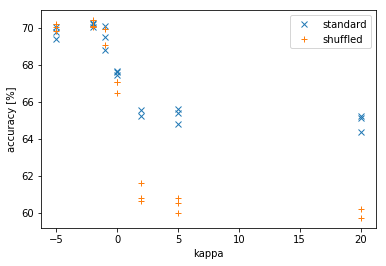

In [31]:
plt.plot(wm_no_shuffle[:,0],wm_no_shuffle[:,1]*100,'x')
plt.plot(wm_shuffle[:,0],wm_shuffle[:,1]*100,'+')
plt.legend(['standard', 'shuffled'] )
plt.ylabel('accuracy [%]')
plt.xlabel('kappa')

(-6, 6)

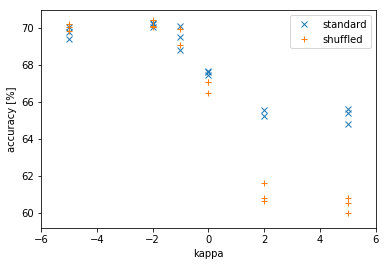

In [32]:
plt.plot(wm_no_shuffle[:,0],wm_no_shuffle[:,1]*100,'x')
plt.plot(wm_shuffle[:,0],wm_shuffle[:,1]*100,'+')
plt.legend(['standard', 'shuffled'] )
plt.ylabel('accuracy [%]')
plt.xlabel('kappa')
plt.xlim([-6,6])

In [33]:
wm_no_shuffle.shape

(20, 2)

In [34]:
wm_shuffle.shape

(19, 2)